In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 데이터 불러오기
train_path = "C:\\Users\\gadi2\\OneDrive\\바탕 화면\\study file\\Module36\\train.csv"
data = pd.read_csv(train_path)

In [4]:
# 2. 데이터셋 정보 확인
print("데이터 일부 확인:")
print(data.head())  # 데이터의 첫 부분 확인
print("\n데이터 기초 통계량:")
print(data.describe())  # 기초 통계량 확인
print("\n데이터 정보:")
print(data.info())  # 데이터 정보 확인 (null 값, 데이터 타입 등)

데이터 일부 확인:
   rn  activity  tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  \
0   7  STANDING            0.279          -0.0196          -0.1100   
1  11  STANDING            0.277          -0.0127          -0.1030   
2  14  STANDING            0.277          -0.0147          -0.1070   
3  15  STANDING            0.298           0.0271          -0.0617   
4  20  STANDING            0.276          -0.0170          -0.1110   

   tBodyAcc.std.X  tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  \
0          -0.997          -0.967          -0.983          -0.997   
1          -0.995          -0.973          -0.985          -0.996   
2          -0.999          -0.991          -0.993          -0.999   
3          -0.989          -0.817          -0.902          -0.989   
4          -0.998          -0.991          -0.998          -0.998   

   tBodyAcc.mad.Y  ...  fBodyBodyGyroJerkMag.meanFreq  \
0          -0.966  ...                          0.146   
1          -0.974  ...                 

In [5]:
# 3. 필요없는 칼럼 제거
data = data.drop(['activity', 'rn'], axis=1)

In [6]:
# 4. 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

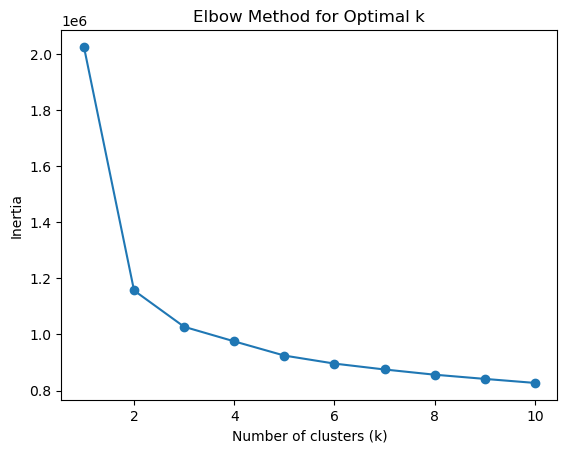

In [7]:
# 5. Elbow Method를 통한 최적의 K 값 찾기
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
# 6. KMeans 모델 학습 및 시각화
optimal_k = 2  # 예시로 최적의 k 값을 2으로 설정
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [9]:
# 6. KMeans 모델 학습 및 시각화
optimal_k = 3  # 예시로 최적의 k 값을 3으로 설정
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

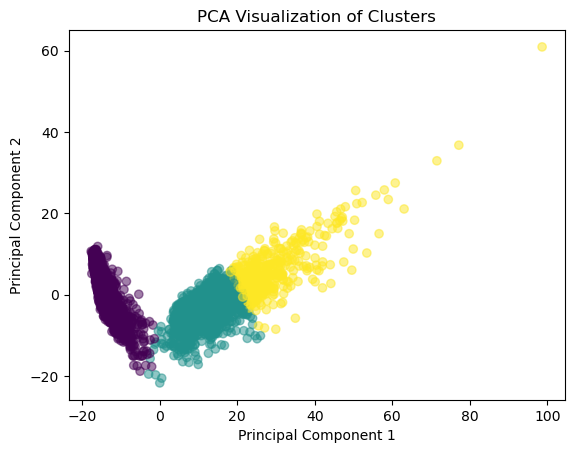

In [10]:
# 7. PCA를 사용한 차원 축소 및 시각화
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.show()

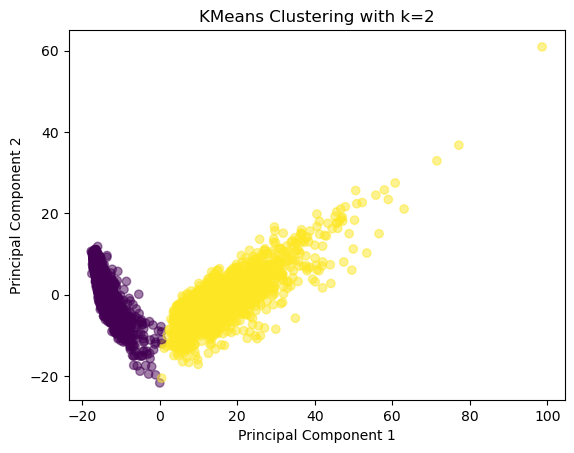

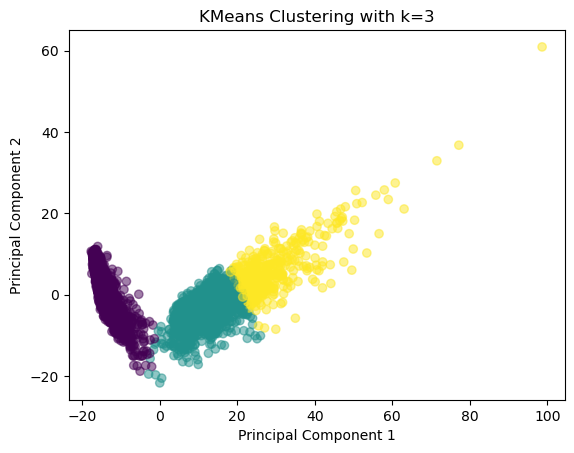

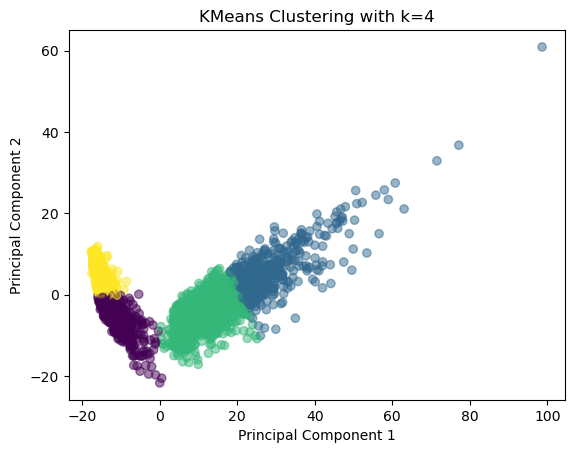

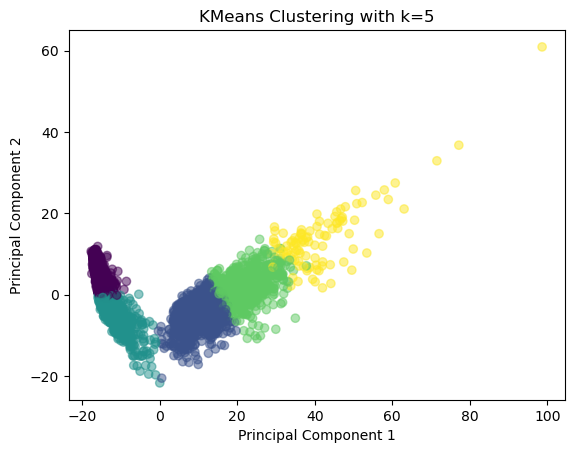

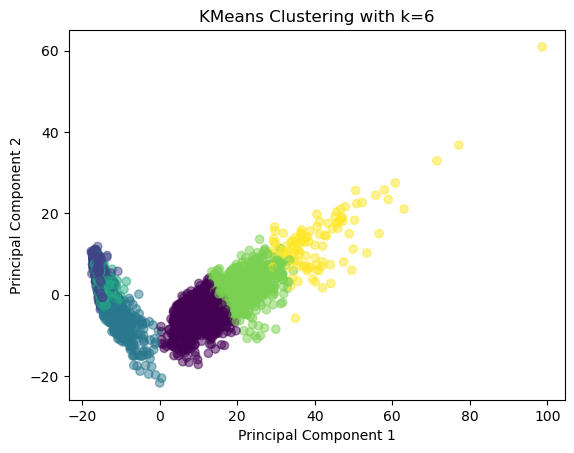

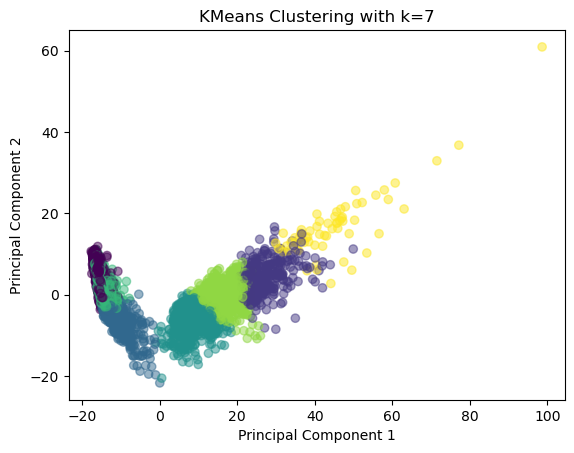

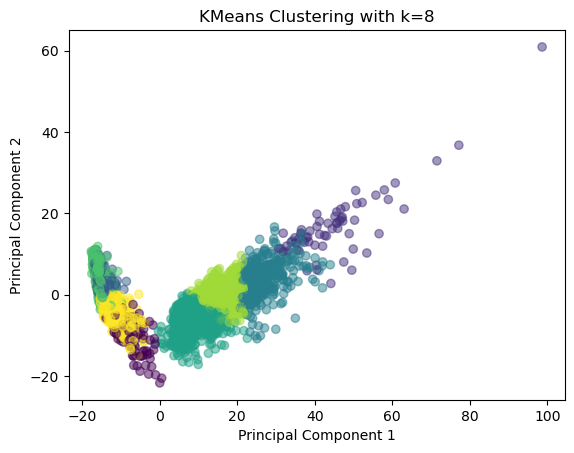

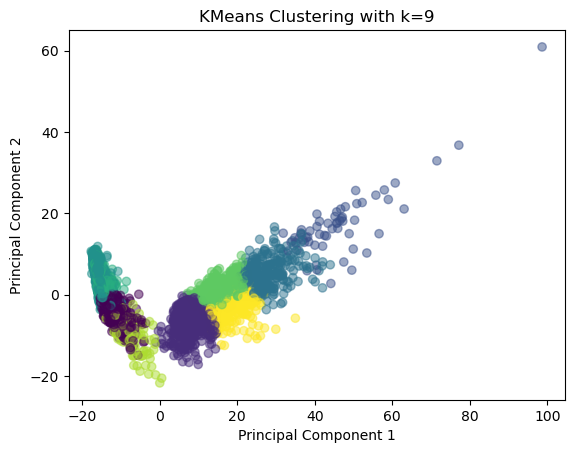

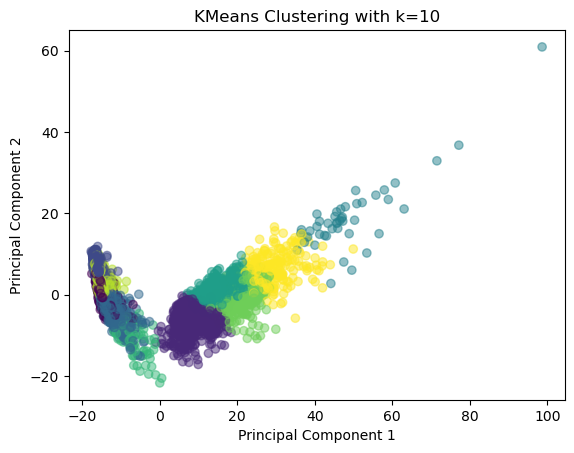

In [11]:
# 8. 다양한 k 값으로 학습 및 2차원 시각화
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10]:  # 다양한 k 값 예시
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'KMeans Clustering with k={k}')
    plt.show()